In [34]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [35]:
dataMat = []
labelMat = []

fr = open("./data.txt")
for line in fr.readlines():
    curLine = line.strip().split()
    
    dataMat.append([1.0,float(curLine[0]),float(curLine[1])])
    labelMat.append(int(curLine[-1]))

In [36]:
print(dataMat)
print("----")
print(labelMat)

[[1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677], [1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677], [1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677]]
----
[0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]


In [37]:
# 定义Sigmoid函数
def Sigmoid(intx):
    return 1.0 / (1 + np.exp(-intx))

In [45]:
dataArr = np.array(dataMat)

m,n = np.shape(dataArr)
weights = np.ones(n)

# 随机梯度，循环500次，观察是否收敛
alpha = 0.001
for j in range(500):
    dataIndex = range(m)
    for i in range(m):
        randIndex = int(random.uniform(0,len(dataIndex)))
        h = Sigmoid(sum(dataArr[dataIndex[randIndex]]*weights))
        errors = labelMat[dataIndex[randIndex]] - h
        weights = weights + alpha * errors * dataArr[dataIndex[randIndex]]
    
    if j%50 == 0:
        print(j,": weights: ",weights,"errors: ",errors)

0 : weights:  [0.99205718 1.00094502 0.9194028 ] errors:  0.001936982356310124
50 : weights:  [ 0.97826947  0.7473503  -0.15682927] errors:  0.7636783729275793
100 : weights:  [ 1.05603814  0.48302258 -0.19572448] errors:  0.7354269194045486
150 : weights:  [ 1.13294104  0.23563196 -0.16823912] errors:  0.49815871657825506
200 : weights:  [ 1.18765823  0.03029941 -0.21630366] errors:  0.6064204666123826
250 : weights:  [ 1.23194329 -0.14203875 -0.2387549 ] errors:  -0.10918223816014791
300 : weights:  [ 1.26620116 -0.29349151 -0.26749046] errors:  0.5719593109323343
350 : weights:  [ 1.29715989 -0.42844178 -0.28506677] errors:  0.36424648770457557
400 : weights:  [ 1.32464064 -0.55394507 -0.30006976] errors:  -0.4499666077865867
450 : weights:  [ 1.34681928 -0.66398033 -0.32949432] errors:  -0.07122980295092252


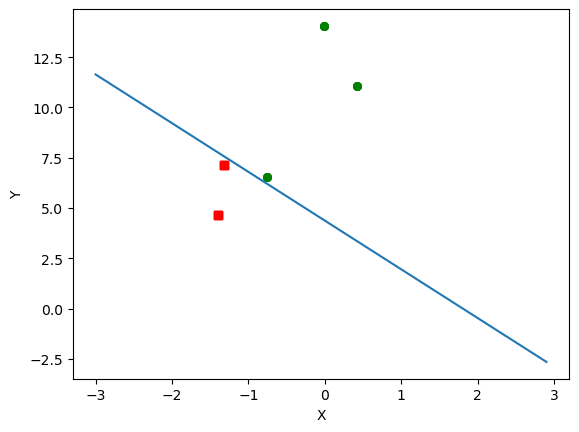

In [41]:
# 数据可视化
n = np.shape(dataArr)[0]
xcord1 = []
ycord1 = []
xcord2 = []
ycord2 = []

for i in range(n):
    if int(labelMat[i]) == 1:
        xcord1.append(dataArr[i, 1])
        ycord1.append(dataArr[i, 2])
    else:
        xcord2.append(dataArr[i, 1])
        ycord2.append(dataArr[i, 2])
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
ax.scatter(xcord2, ycord2, s=30, c='green')
x = np.arange(-3.0, 3.0, 0.1)

y = (-weights[0] - weights[1] * x) / weights[2]
ax.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()